In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = '../logs_dir/patient219_cal/'
p219_VD = np.load(path+'patient219_thesis.npy')

data_path = '../datasets/ataxia_reduc/data.npy'
mask_path = '../datasets/ataxia_reduc/mask.npy'
data = np.load(data_path, allow_pickle=True).astype(float)
mask = np.load(mask_path, allow_pickle=True)
data[np.nonzero(mask)] = np.nan

true219 = data[219,:,:]

In [4]:
mask_path = '../datasets/ataxia_reduc/mask.npy'
data = np.load(data_path, allow_pickle=True).astype(float)
mask = np.load(mask_path, allow_pickle=True)
print(np.sum((1-mask[5,:,0])>0))

2


In [8]:
FARSn_dict = {
'facial atrophy ': 13,
'tongue atrophy':14,
'cough':15,
'speech':16,
'heel sheen slide right':17,
'heel sheen slide left':18,
'heel sheen tap right':19,
'heel sheen tap left':20,
'muscle atrophy lateral right':21,
'muscle atrophy lateral left':22,
'muscle weakness lateral right':23,
'muscle weakness lateral left':24,
}

ADL_dict = {
    'Bladder':77,
            'Cutting':78,
            'Dressing':79,
            'Falling':80,
            'Personal hygiene':81,
            'Quality of Sitting Position':82,
            'Speech':83,
            'Swallowing':84,
            'Walking':85,}

nine_HPT_dict = {'Dominant Hand':3, 
    'Non Dominant Hand':4} 

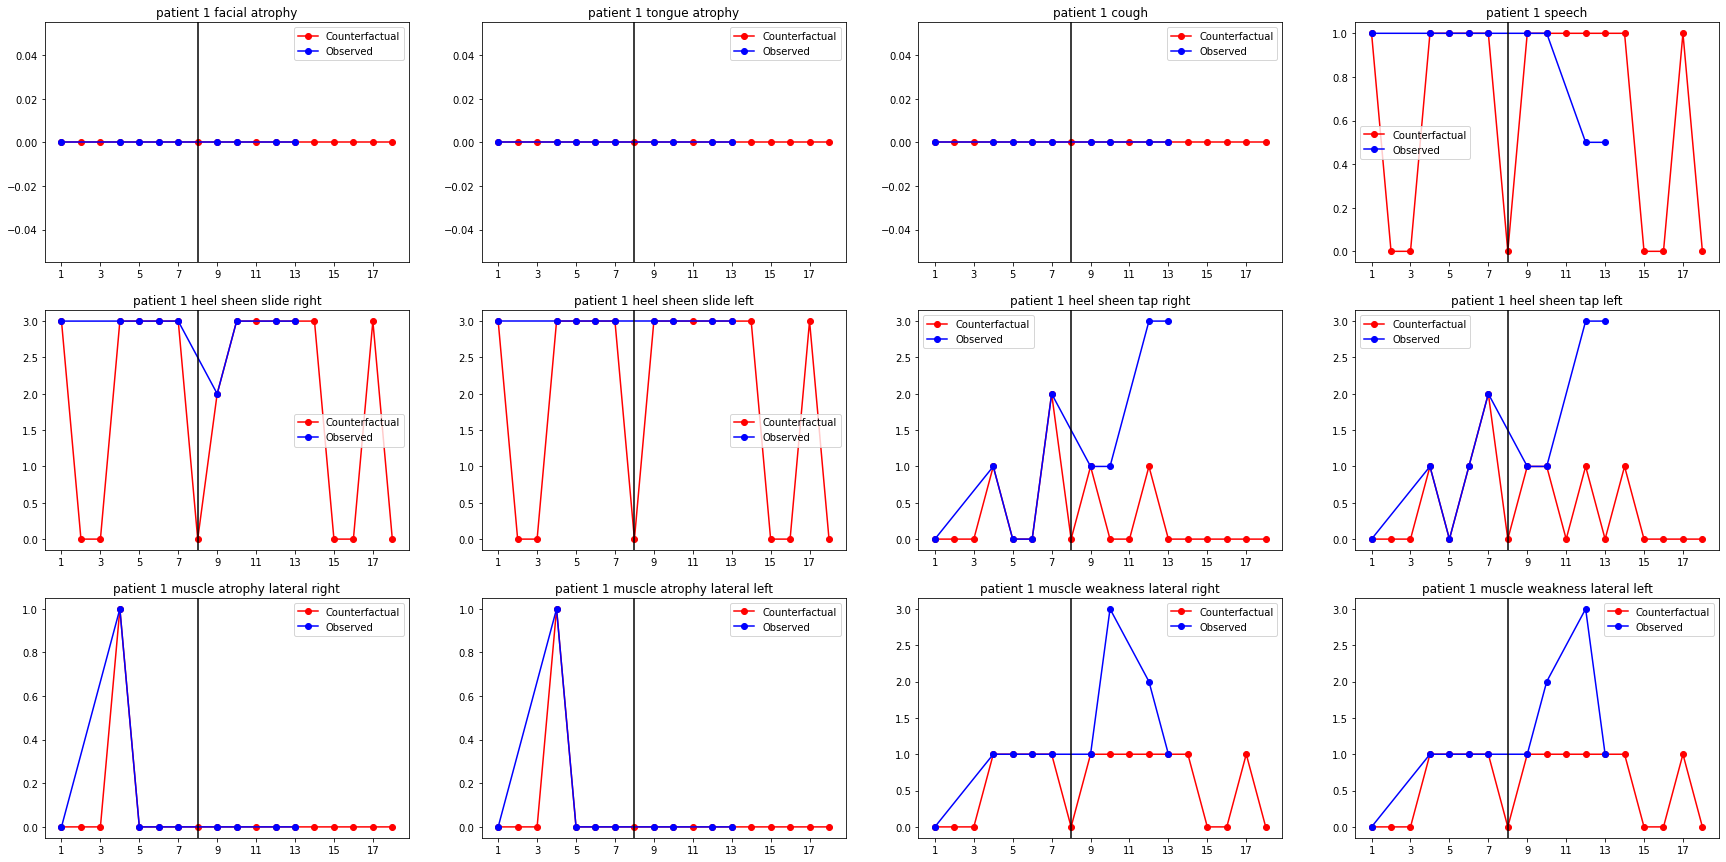

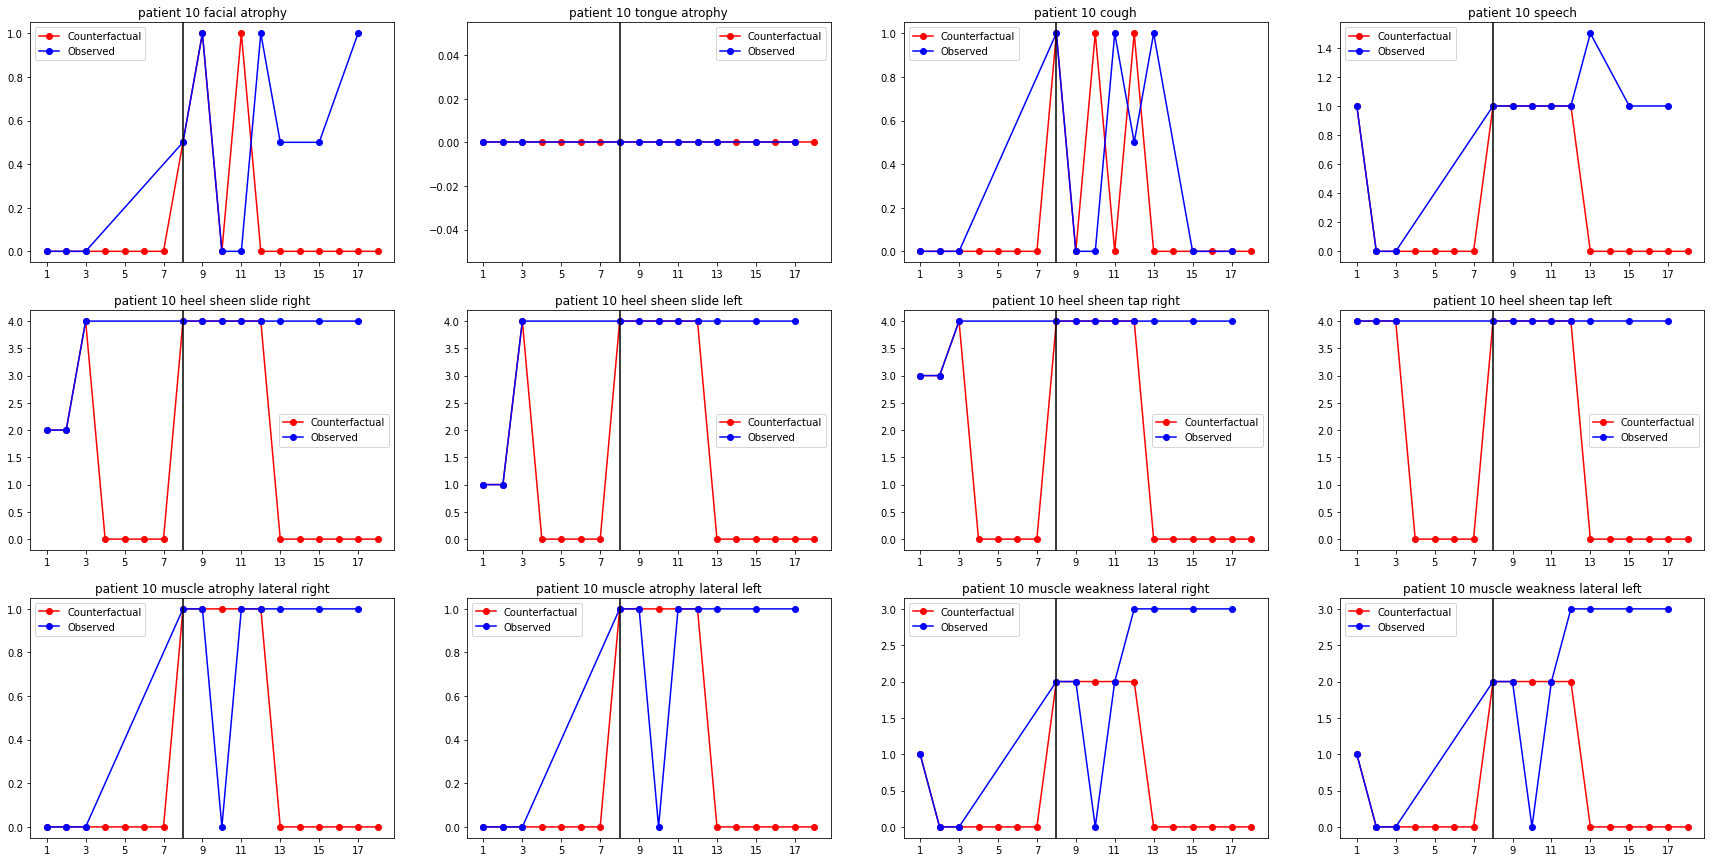

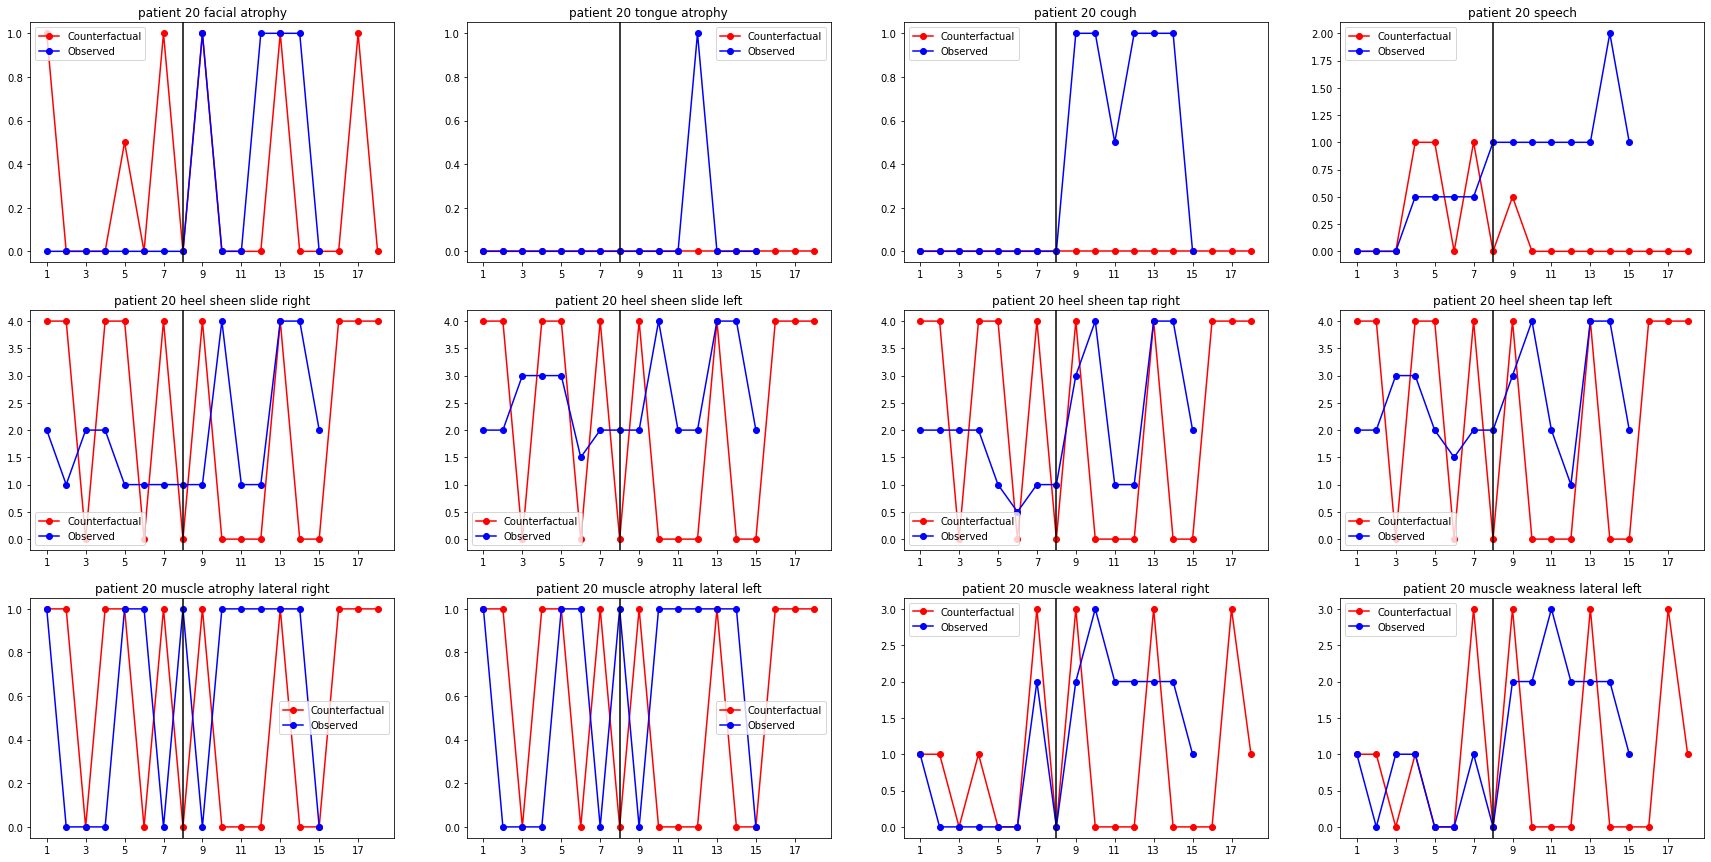

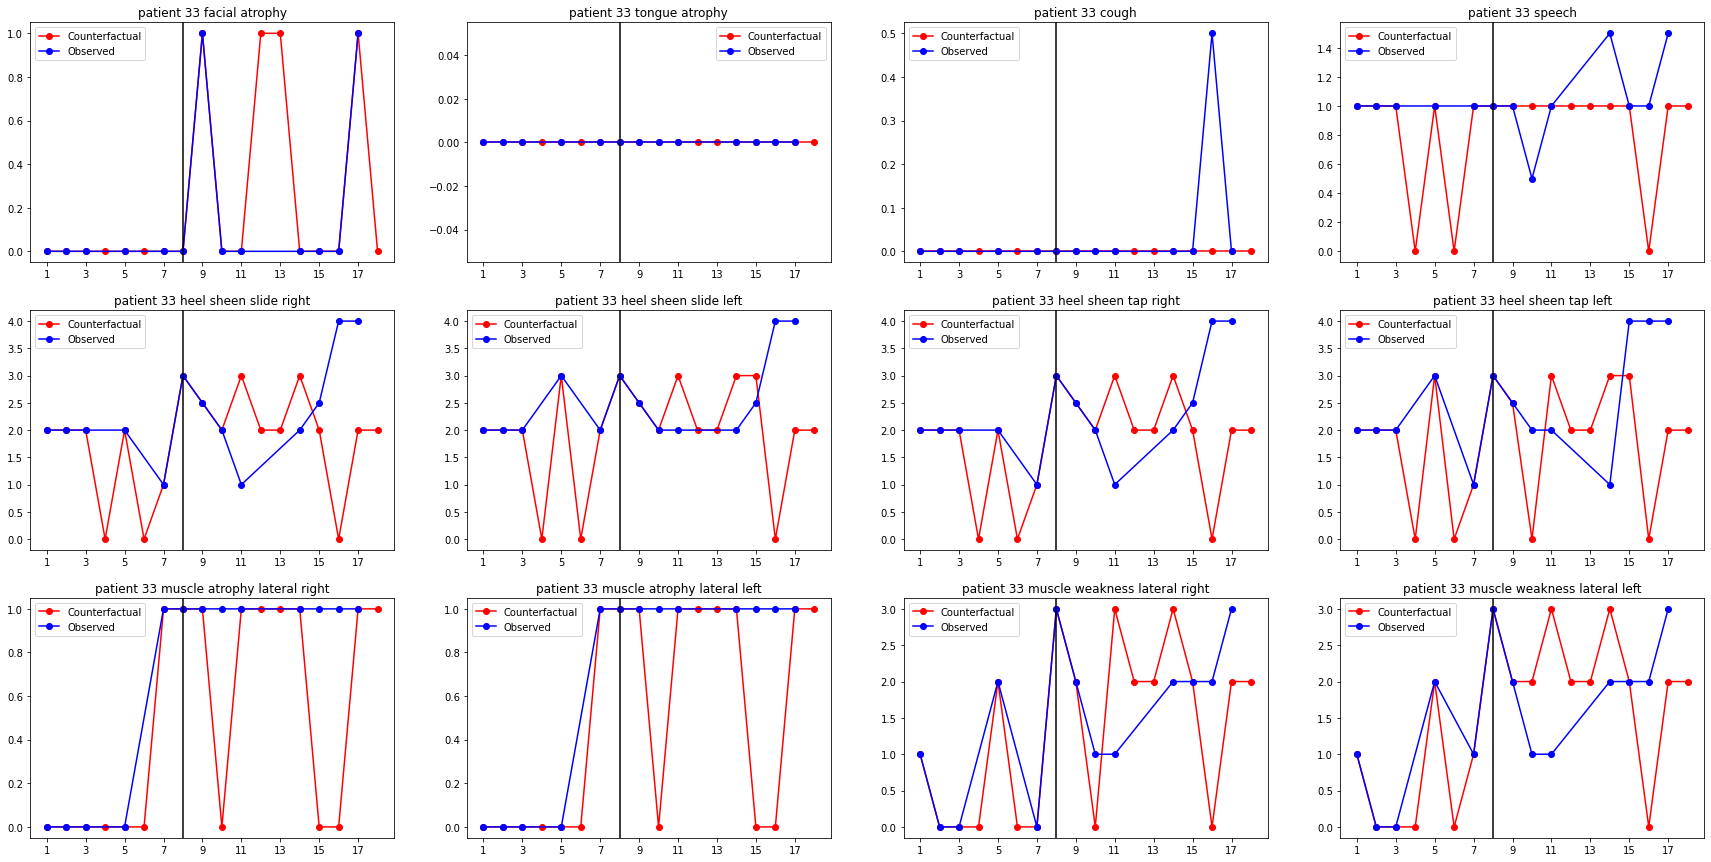

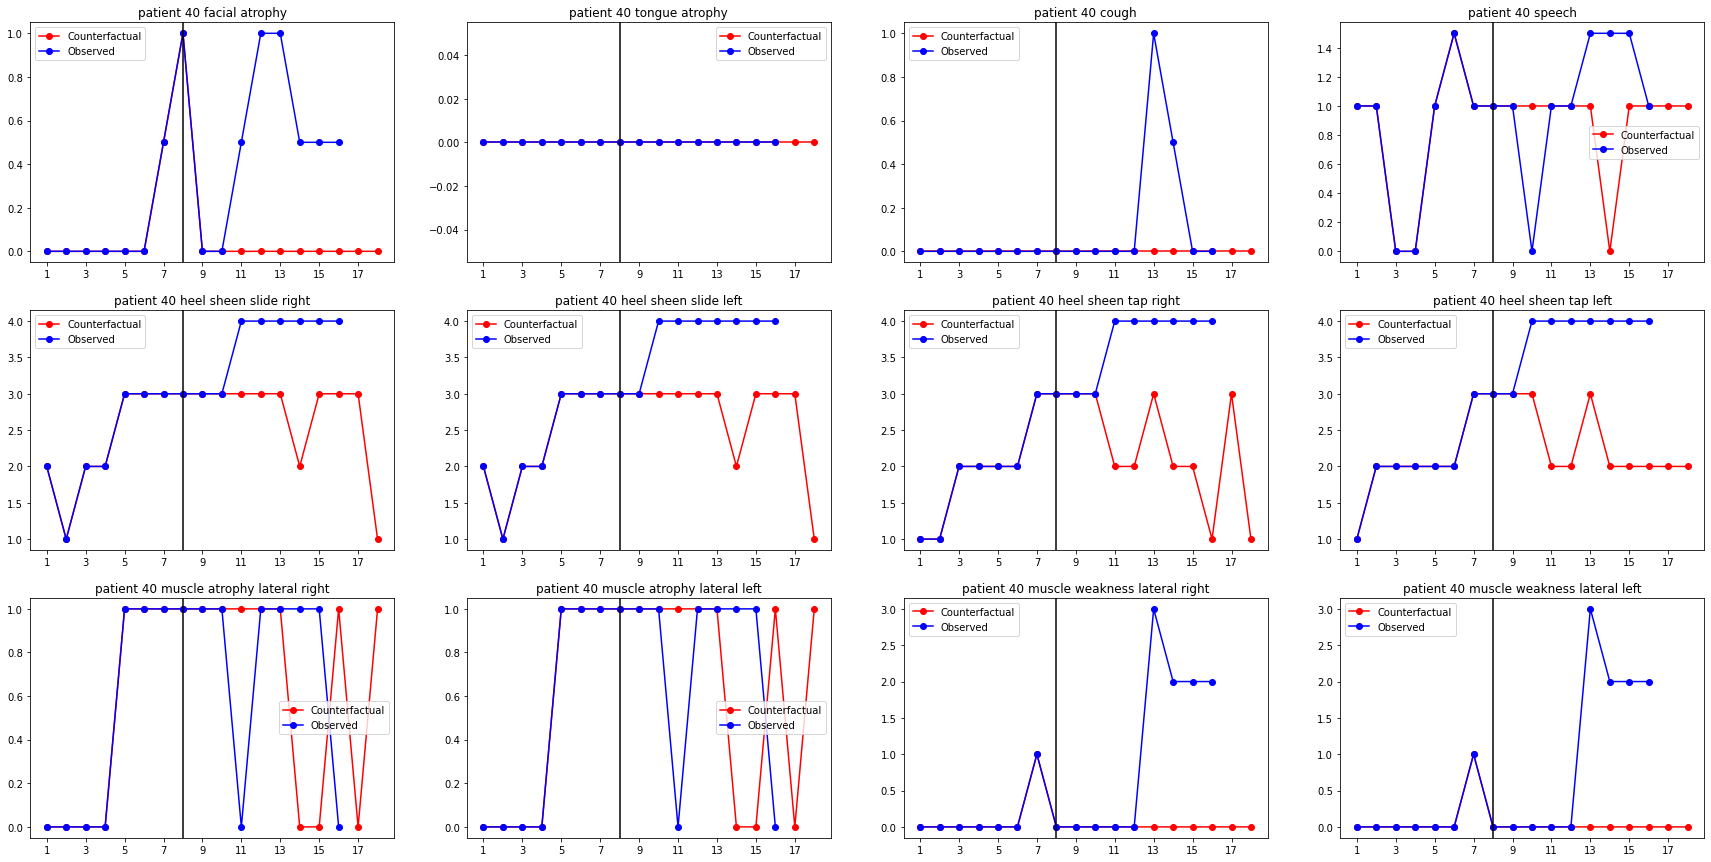

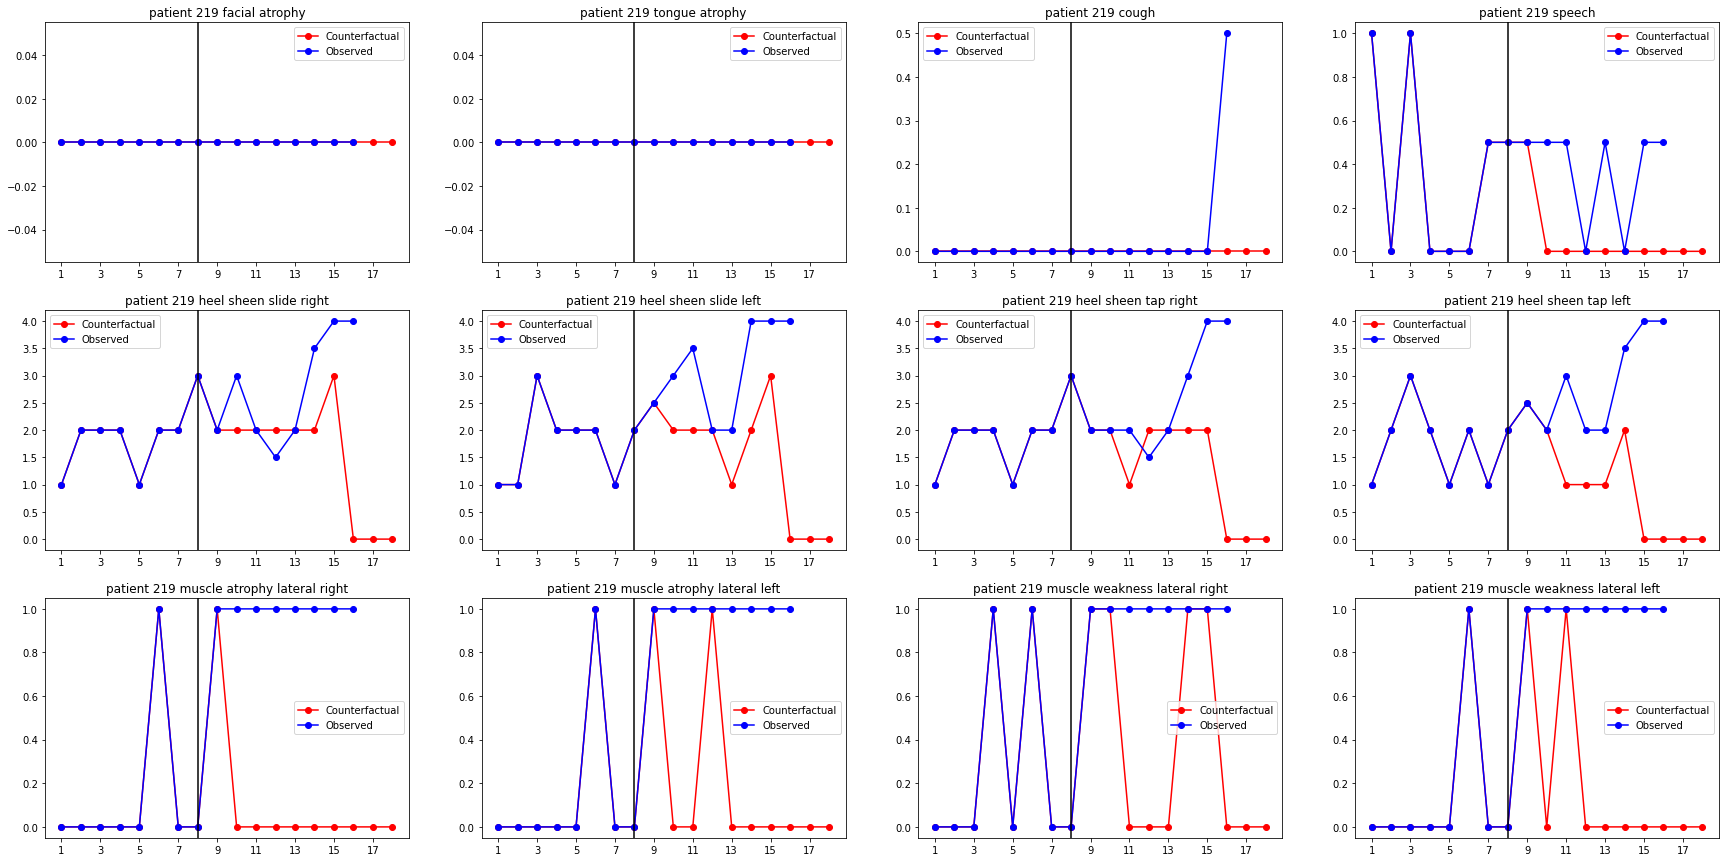

In [64]:
#plot FARSn counterfactuals

all_data = np.load('../datasets/ataxia_reduc/data.npy',allow_pickle=True)
all_mask = np.load('../datasets/ataxia_reduc/mask.npy',allow_pickle=True)

patients = [1,10,20,40,219]


xrange = np.arange(1,19)
xint = np.arange(1,19,2)

for i, patient in enumerate(patients):
    
    if patient != 219:
        datapath = '../logs_dir/ataxia_{i}/target.npy'.format(i=i)
    else:
        datapath = '../logs_dir/patient219_cal/patient219_thesis.npy'
    counterfactual = np.load(datapath)
    mask = (1- all_mask[patient]) > 0 
    observed = all_data[patient]

    plt.figure(figsize=(30,15))

    for i, (keys,vals) in enumerate(FARSn_dict.items()):

        ax = plt.subplot(3,4,i+1)
        metric_counterfactual = counterfactual[4:22,vals]
        ax.plot(xrange,counterfactual[4:22,vals], 'or-',label='Counterfactual')
        mask_this = mask[:,vals]
        ax.plot(xrange[mask_this],observed[:,vals][mask_this].astype(float), 'ob-',label='Observed')
        ax.axvline(8, c='black')
        ax.set_title(f'patient {patient} '+keys)
        ax.set_xticks(xint,minor=False)
        ax.legend()
    plt.show()
    

           


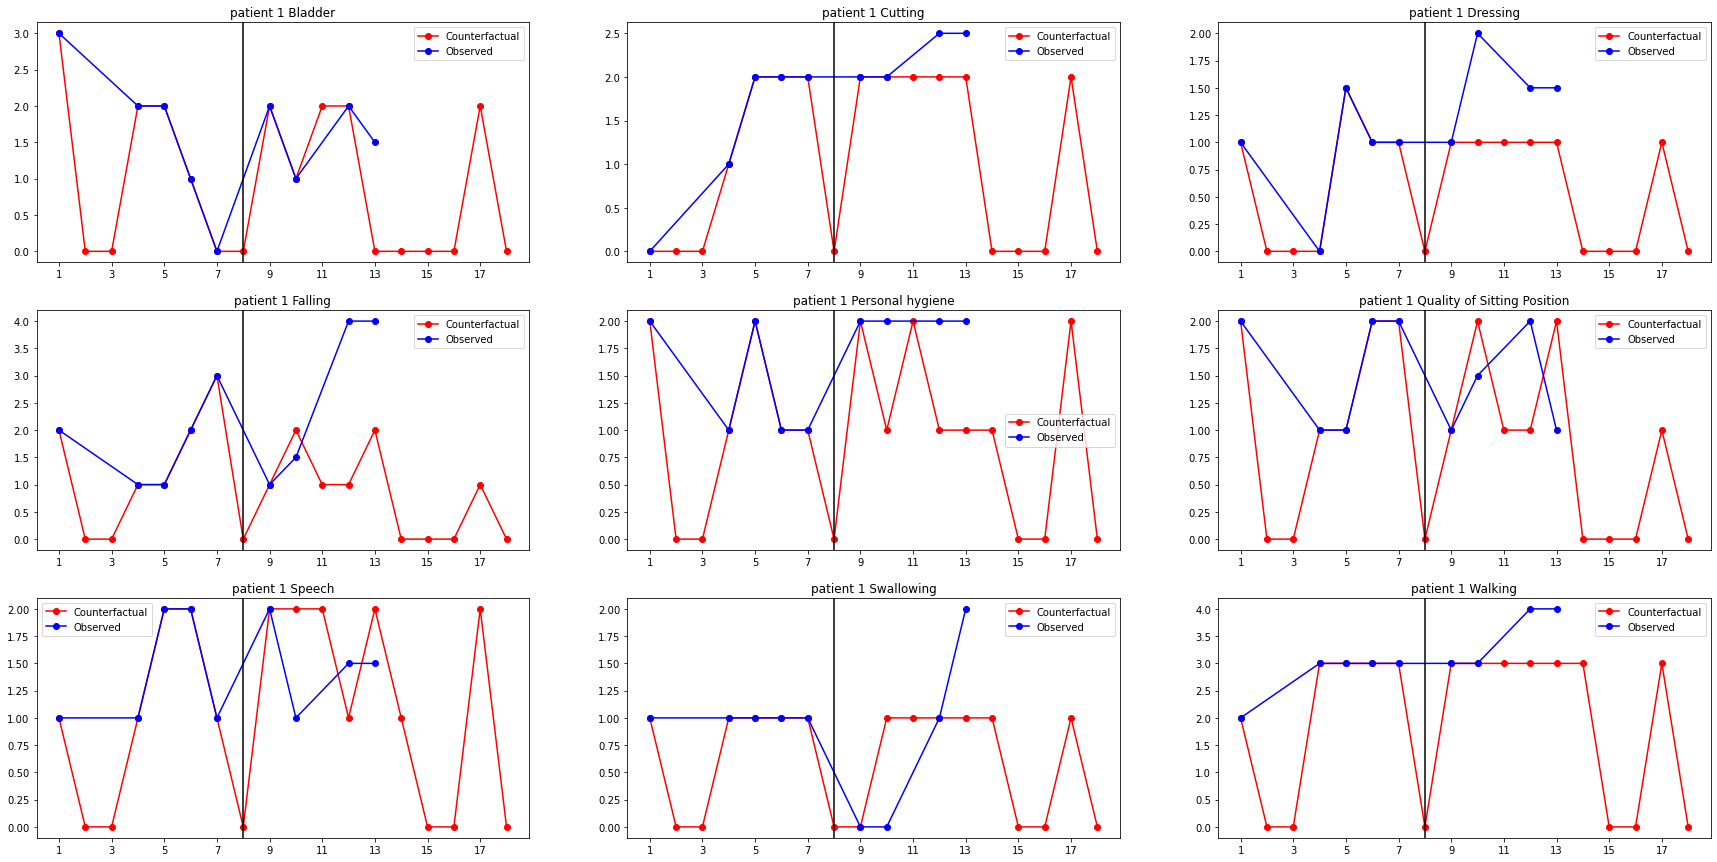

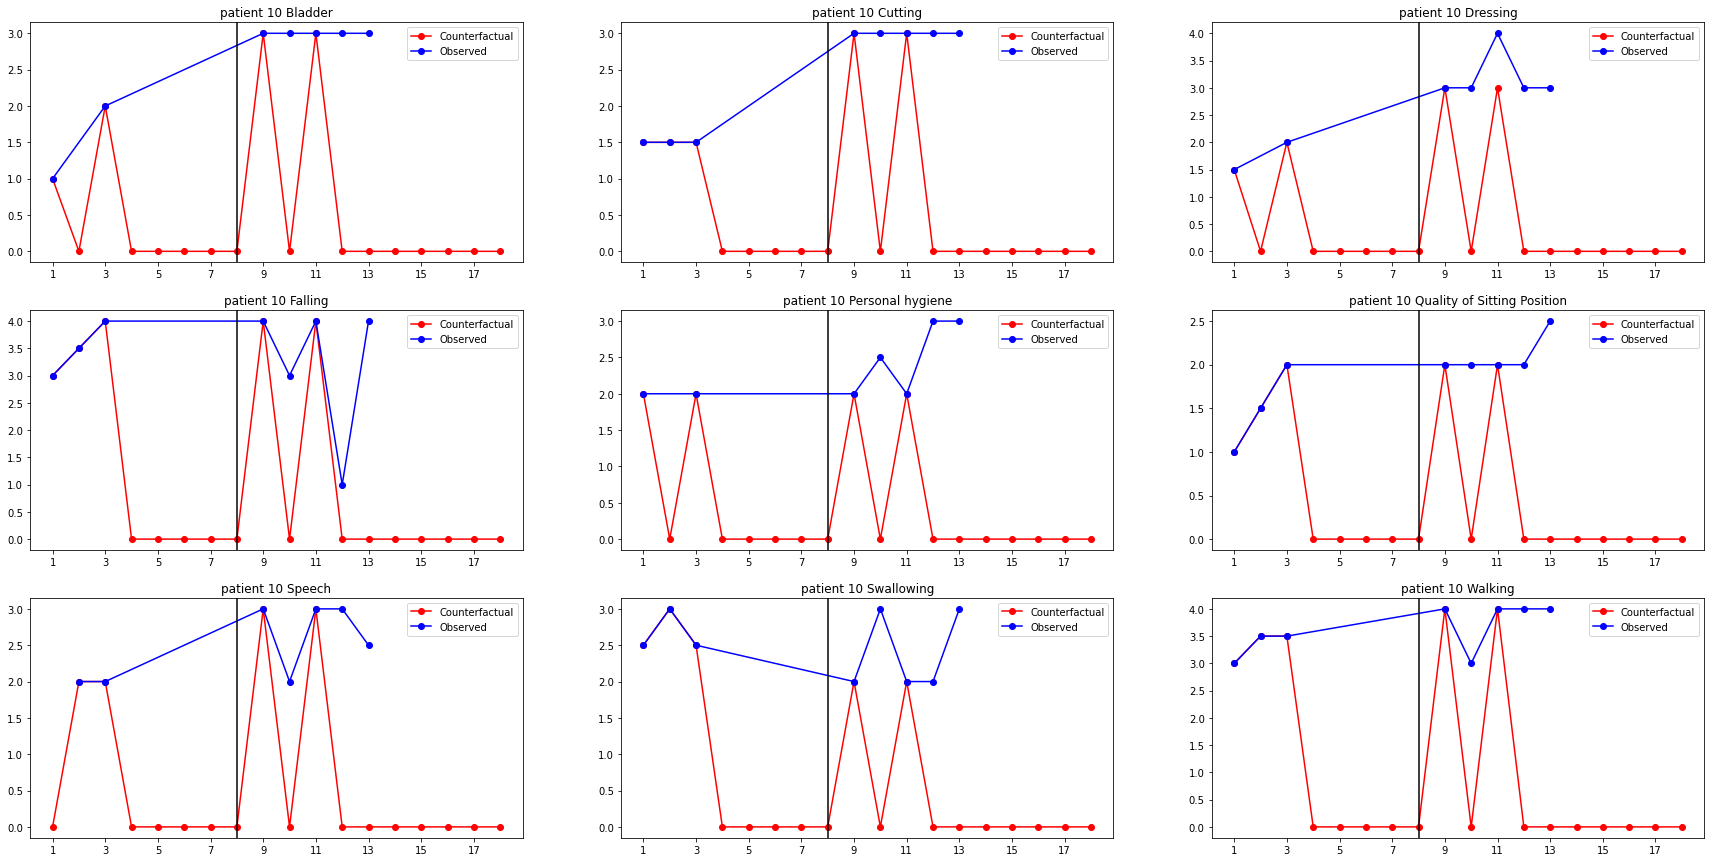

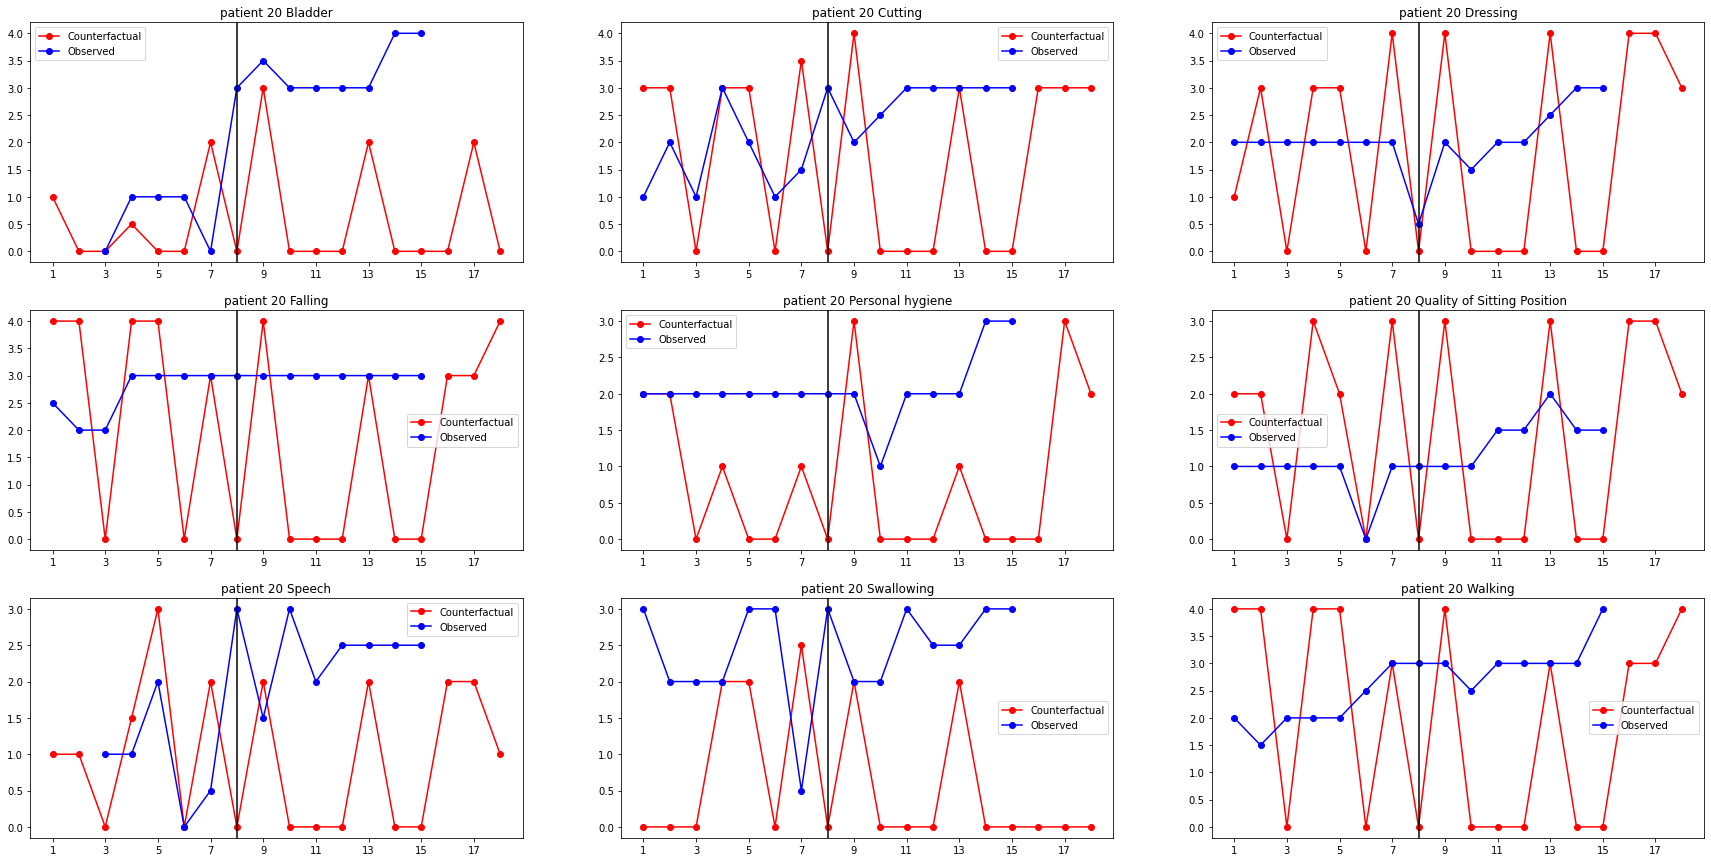

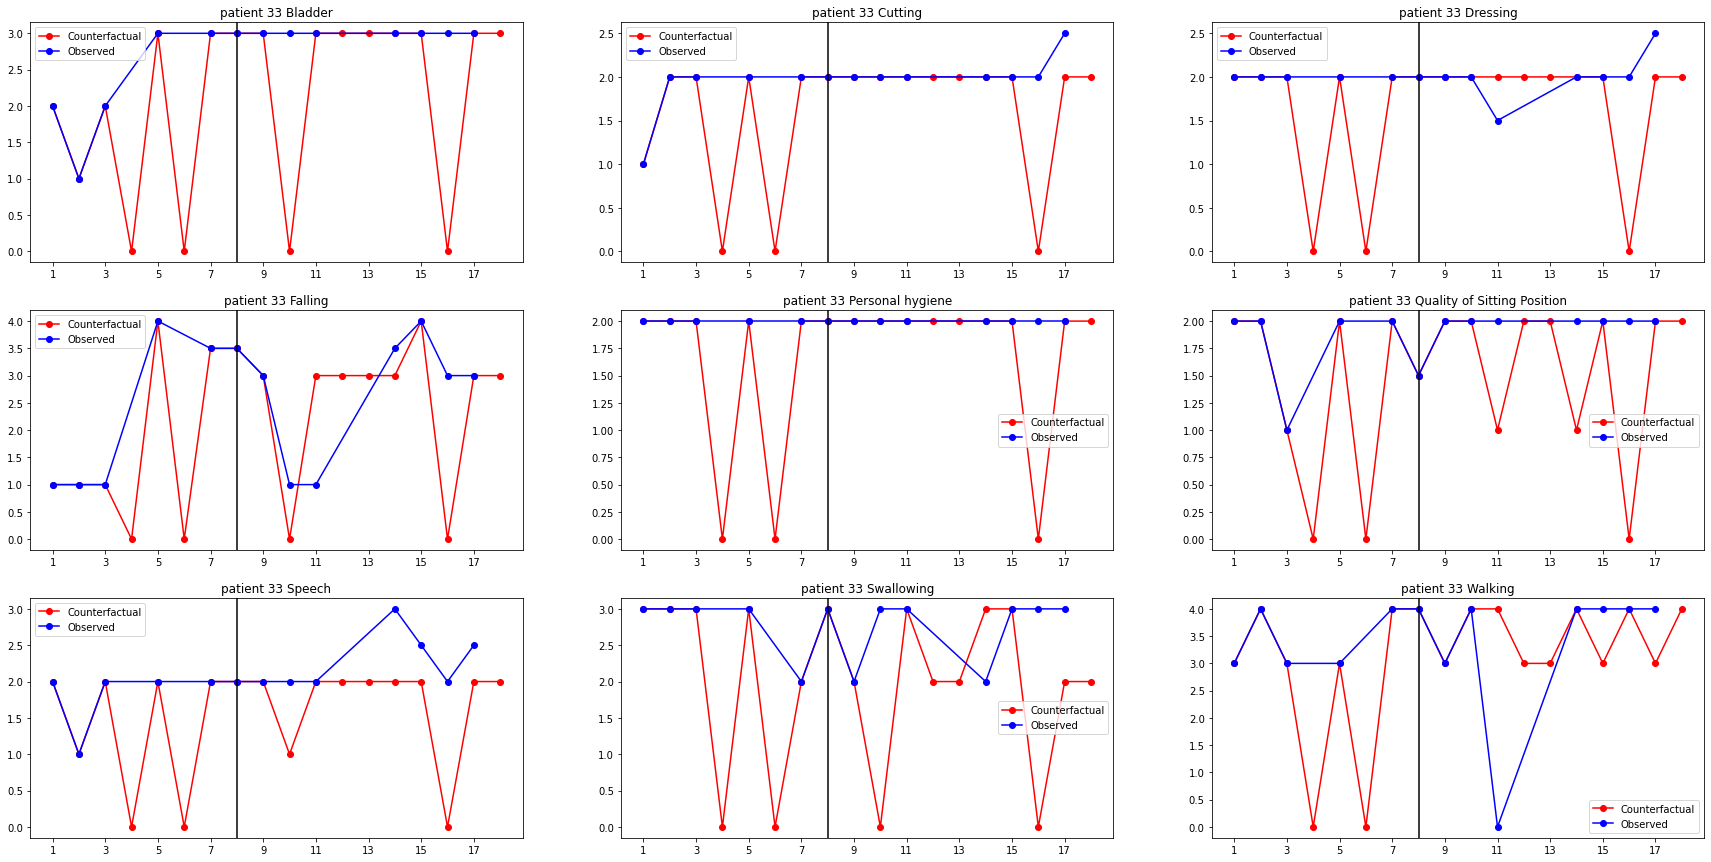

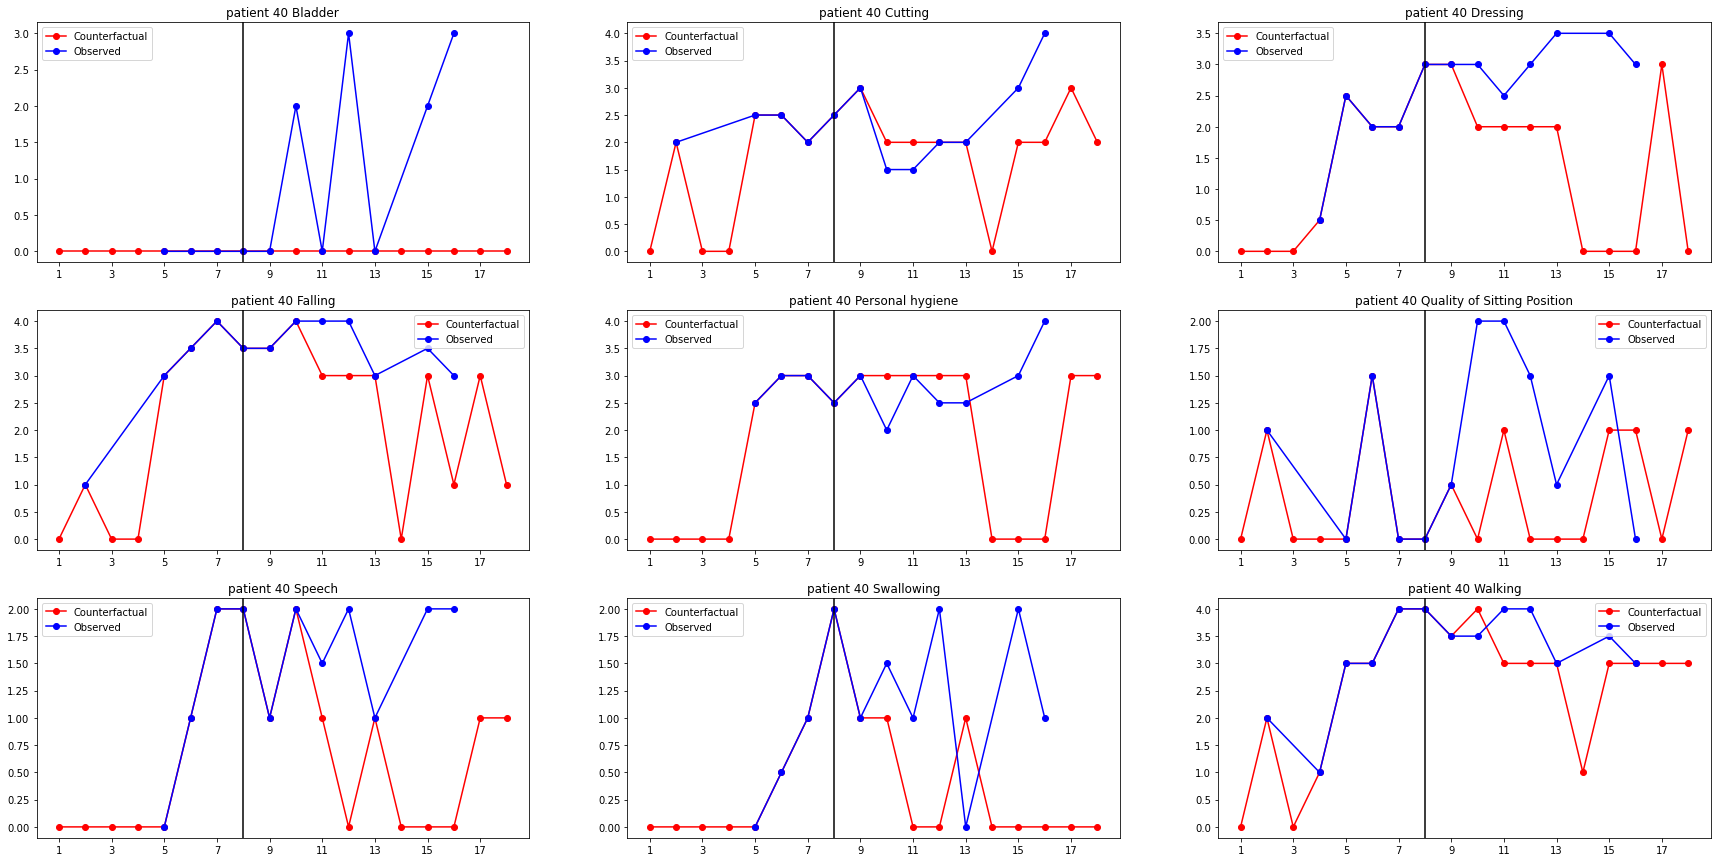

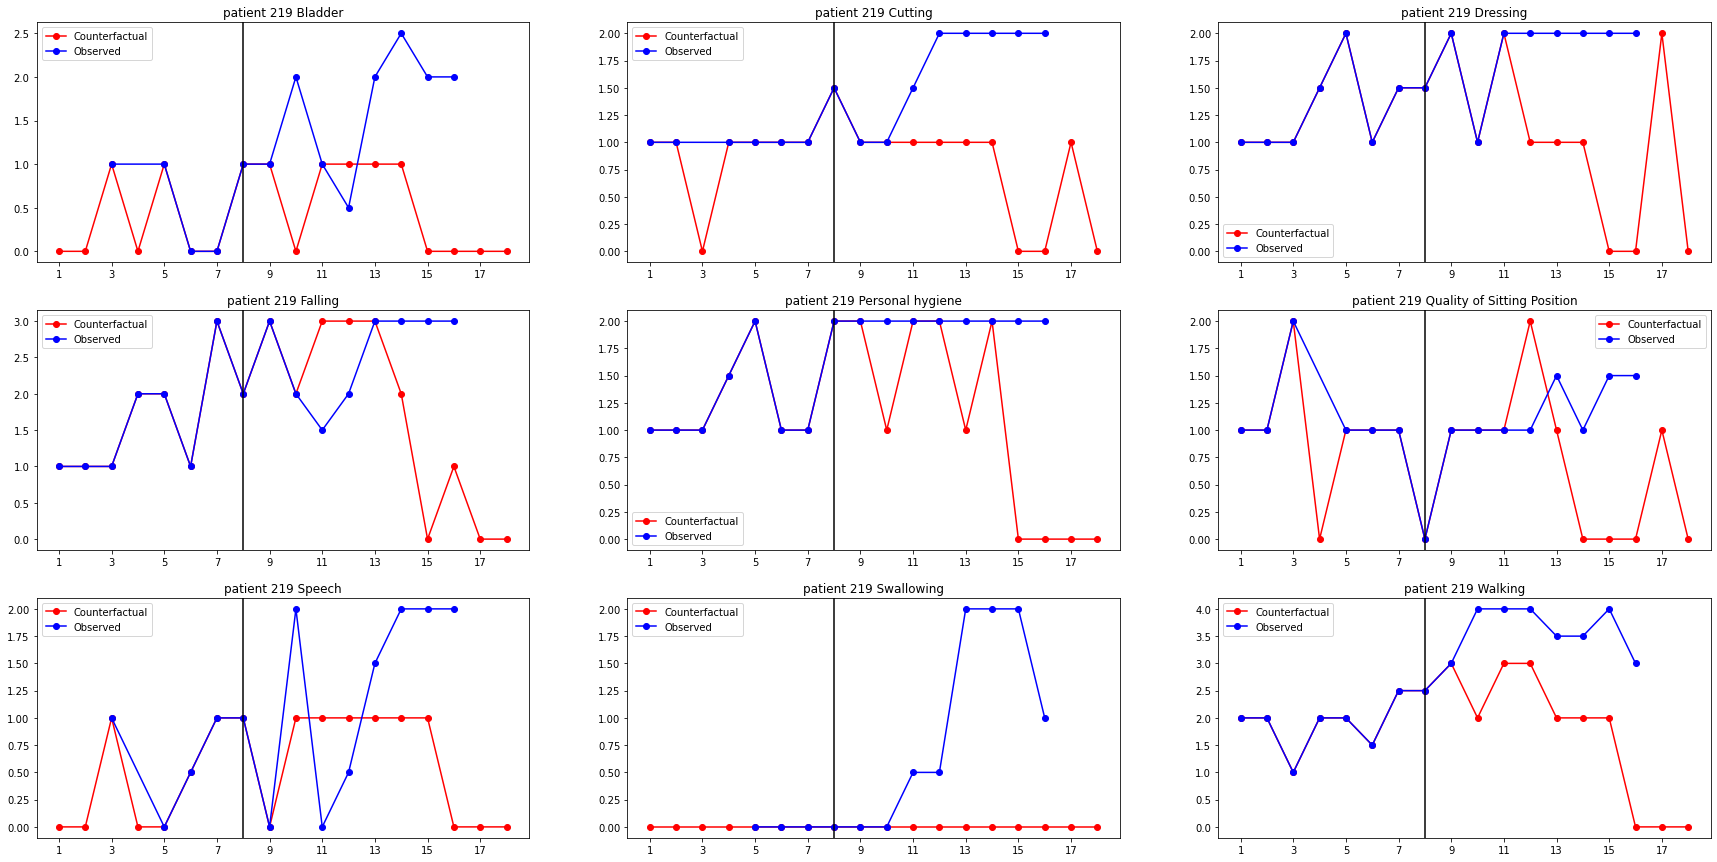

In [56]:
#plot ADL counterfactuals

all_data = np.load('../datasets/ataxia_reduc/data.npy',allow_pickle=True)
all_mask = np.load('../datasets/ataxia_reduc/mask.npy',allow_pickle=True)

patients = [1,10,20,33,40,219]


xrange = np.arange(1,19)

xint = np.arange(1,19,2)


for i, patient in enumerate(patients):
    
    if patient != 219:
        datapath = '../logs_dir/ataxia_{i}/target.npy'.format(i=i)
    else:
        datapath = '../logs_dir/patient219_cal/patient219_thesis.npy'
        
    counterfactual = np.load(datapath)
    mask = (1- all_mask[patient]) > 0 
    observed = all_data[patient]

    plt.figure(figsize=(30,15))

    for i, (keys,vals) in enumerate(ADL_dict.items()):

        ax = plt.subplot(3,3,i+1)
        metric_counterfactual = counterfactual[4:22,vals]
        ax.plot(xrange,counterfactual[4:22,vals],'or-', label='Counterfactual')
        mask_this = mask[:,vals]
        ax.plot(xrange[mask_this],observed[:,vals][mask_this].astype(float), 'ob-',label='Observed')
        ax.axvline(8, c='black')
        ax.set_title(f'patient {patient} '+keys)
        ax.set_xticks(xint,minor=False)
        ax.legend()
    plt.show()
    

           


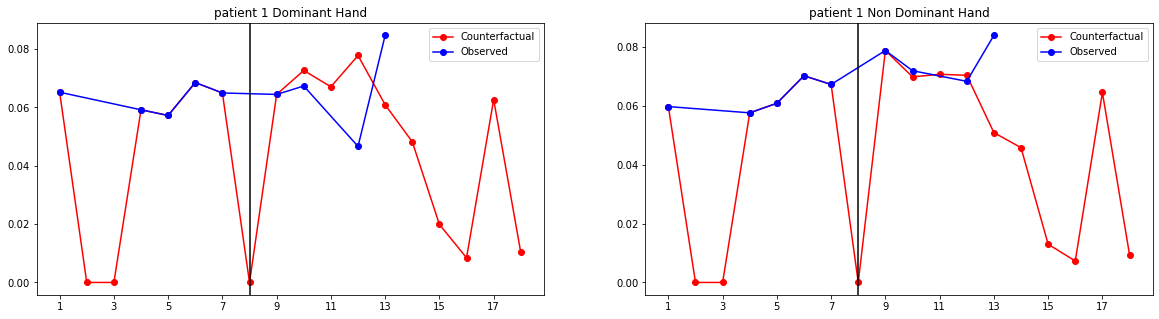

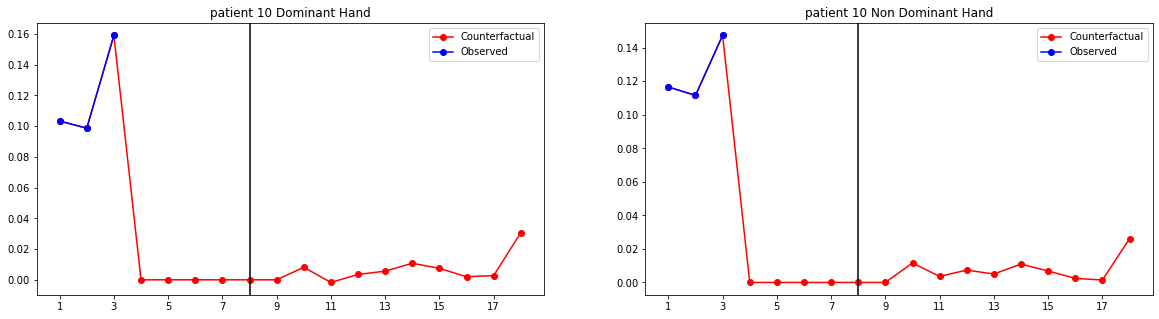

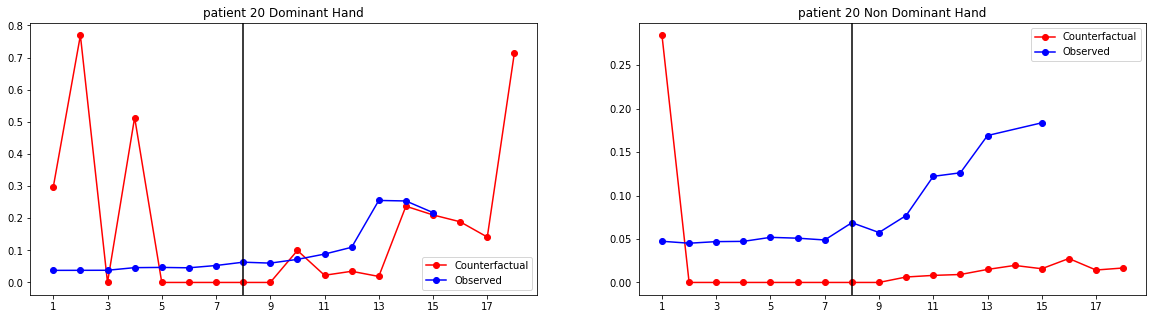

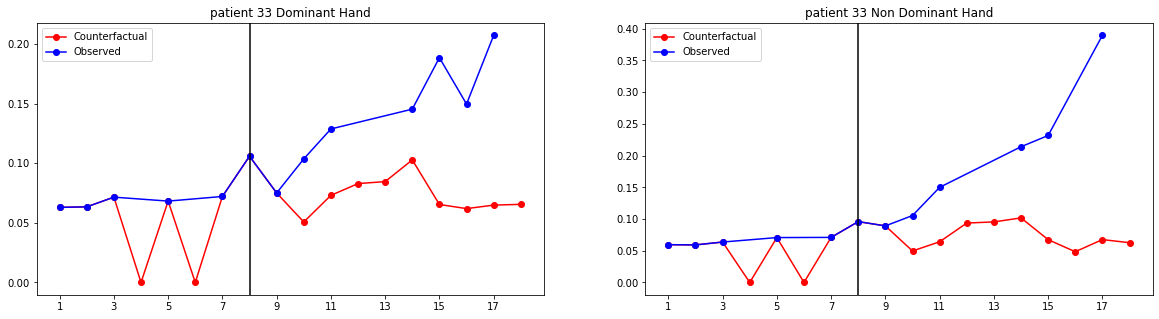

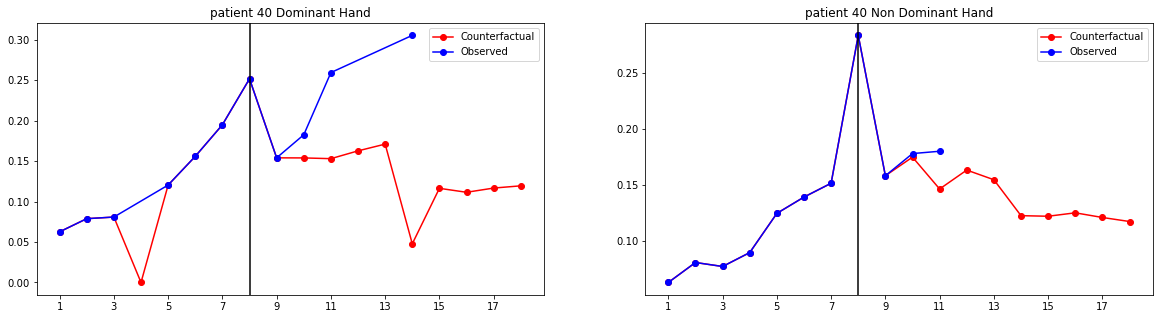

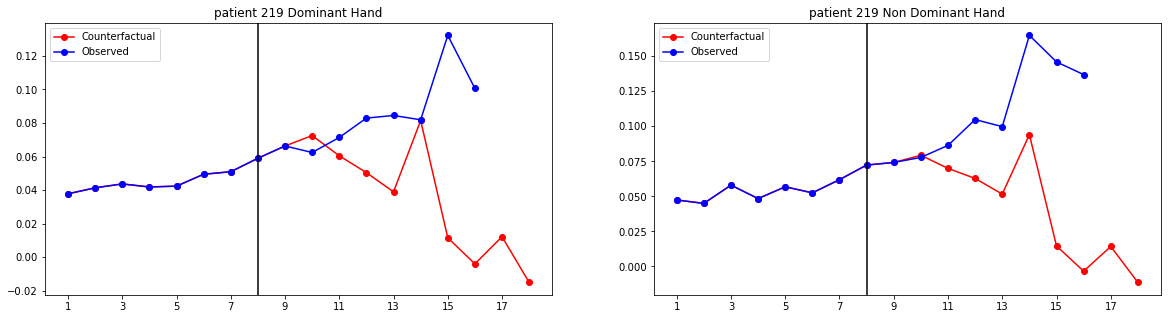

In [61]:
#plot  9-HPT counterfactuals

all_data = np.load('../datasets/ataxia_reduc/data.npy',allow_pickle=True)
all_mask = np.load('../datasets/ataxia_reduc/mask.npy',allow_pickle=True)

patients = [1,10,20,33,40,219]


xrange = np.arange(1,19)

xint = np.arange(1,19,2)


for i, patient in enumerate(patients):
    
    if patient != 219:
        datapath = '../logs_dir/ataxia_{i}/target.npy'.format(i=i)
    else:
        datapath = '../logs_dir/patient219_cal/patient219_thesis.npy'
        
    counterfactual = np.load(datapath)
    mask = (1- all_mask[patient]) > 0 
    observed = all_data[patient]

    plt.figure(figsize=(20,5))

    for i, (keys,vals) in enumerate(nine_HPT_dict.items()):

        ax = plt.subplot(1,2,i+1)
        metric_counterfactual = counterfactual[4:22,vals]
        ax.plot(xrange,counterfactual[4:22,vals],'or-', label='Counterfactual')
        mask_this = mask[:,vals]
        ax.plot(xrange[mask_this],observed[:,vals][mask_this].astype(float), 'ob-',label='Observed')
        ax.axvline(8, c='black')
        ax.set_title(f'patient {patient} '+keys)
        ax.set_xticks(xint,minor=False)
        ax.legend()
    plt.show()
    

           


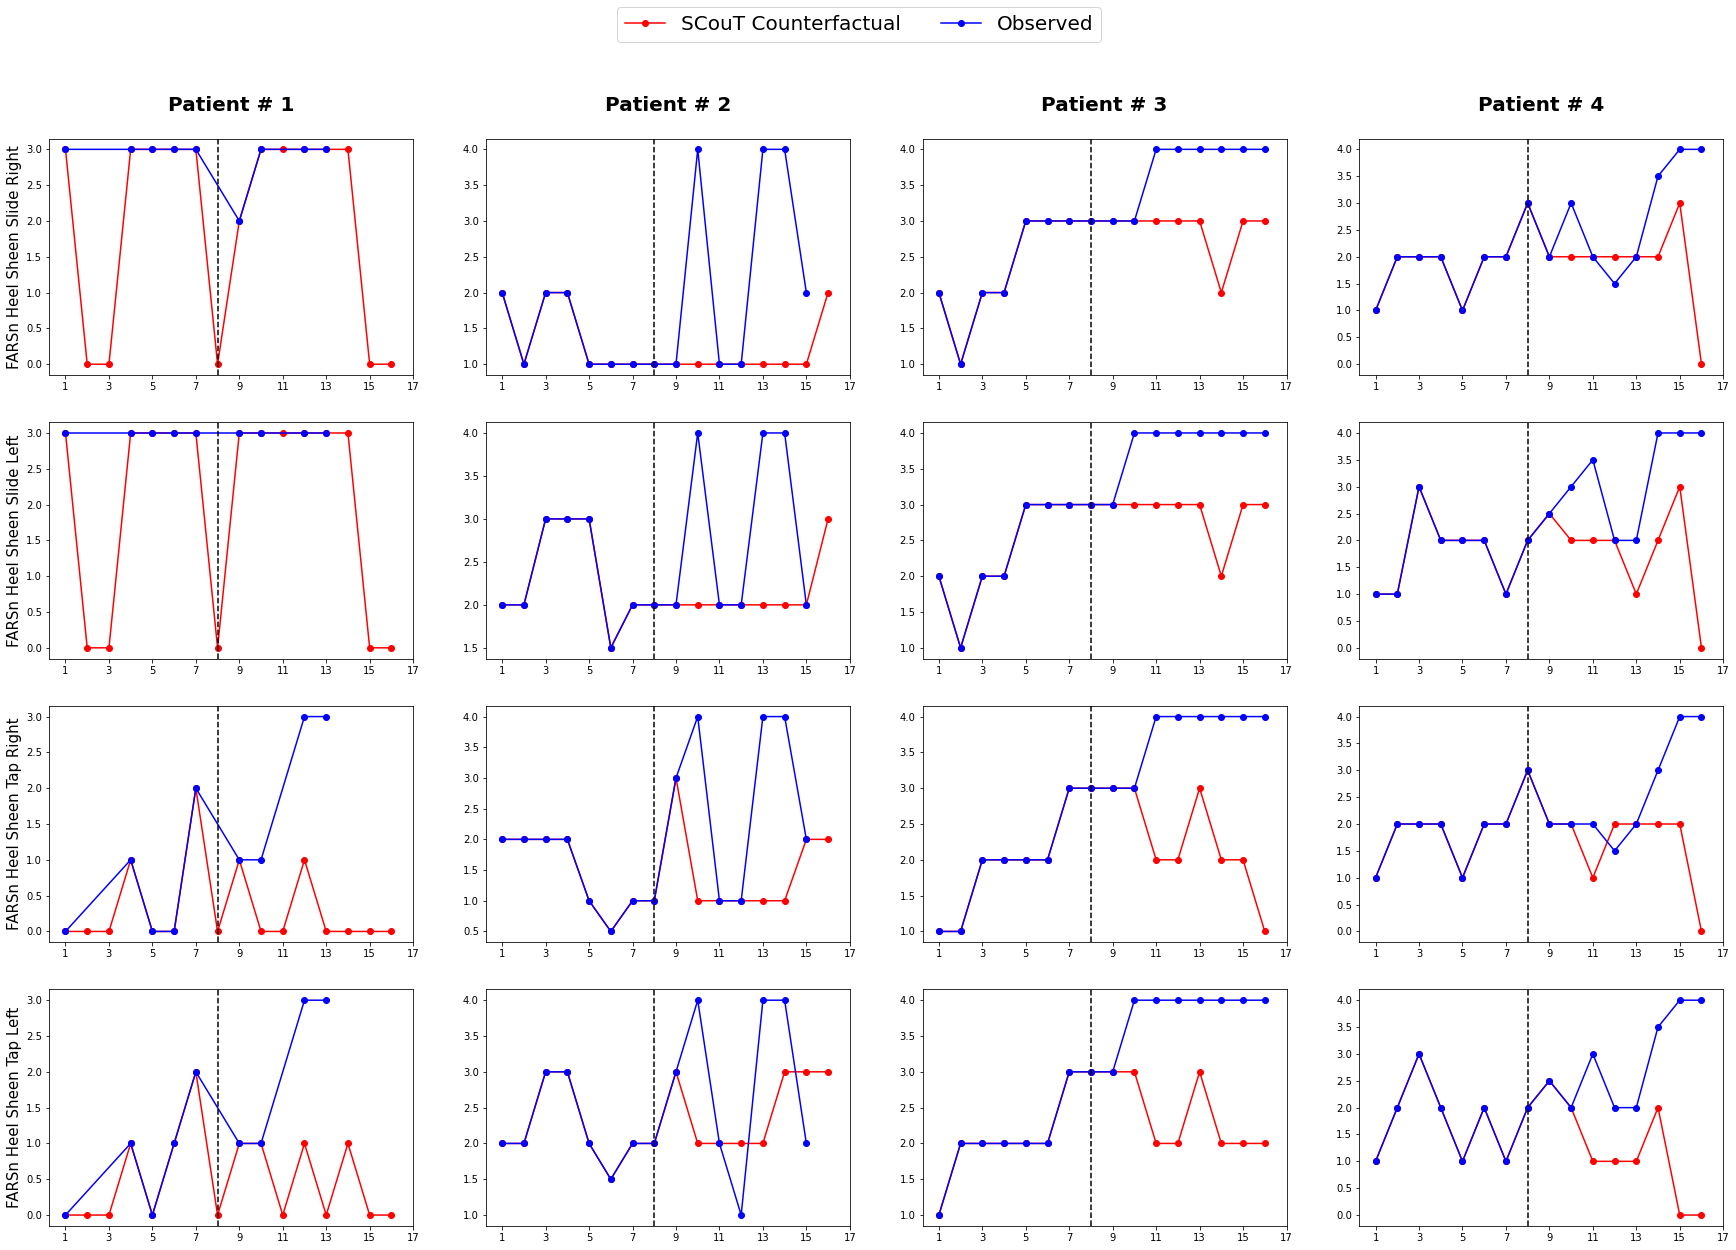

In [20]:
#plot FARSn counterfactuals

all_data = np.load('../datasets/ataxia_reduc/data.npy',allow_pickle=True)
all_mask = np.load('../datasets/ataxia_reduc/mask.npy',allow_pickle=True)

patients = {'1':0,'20':2,'40':4,'219':None}

xrange = np.arange(1,19)
xint = np.arange(1,19,2)

FARSn_dict_metrics = {
'FARSn Heel Sheen Slide Right':17,
'FARSn Heel Sheen Slide Left':18,
'FARSn Heel Sheen Tap Right':19,
'FARSn Heel Sheen Tap Left':20,
}

fig, big_axes = plt.subplots(figsize=(30, 20) , nrows=1, ncols=4, sharey=True) 

for title, big_ax in zip(['Patient # 1', 'Patient # 2', 'Patient # 3', 'Patient # 4'], big_axes):
    big_ax.set_title(f'{title}\n', fontweight='semibold',fontsize=20)
    big_ax.set_frame_on(False)
    big_ax.axis('off')


for j, (keys, vals) in enumerate(FARSn_dict_metrics.items()):
    
    for i,(key_patients,value_patients) in enumerate(patients.items()):
        
        patient = int(key_patients)
        if patient != 219:
            datapath = f'../logs_dir/ataxia_{value_patients}/target.npy'
        else:
            datapath = '../logs_dir/patient219_cal/patient219_thesis.npy'
        
        ax = fig.add_subplot(4,4,4*j+i+1)
        
        counterfactual = np.load(datapath)
        mask = (1- all_mask[patient]) > 0 
        observed = all_data[patient]
        ax.plot(xrange[:16],counterfactual[4:20,vals], 'or-',label='SCouT Counterfactual')
        mask_this = mask[:,vals]
        ax.plot(xrange[mask_this],observed[:,vals][mask_this].astype(float), 'ob-',label='Observed')
        ax.axvline(8, c='black',linestyle='--')
        
        ax.set_xticks(xint,minor=False)

        if i == 0:
            plt.ylabel(keys,fontsize=15)
    
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,labels, loc='lower center',ncol=2,bbox_to_anchor=(0.5,0.94),fontsize=20)
plt.savefig(f'./figs/farsn_ataxia.pdf',bbox_inches='tight')    
plt.show()

    

           


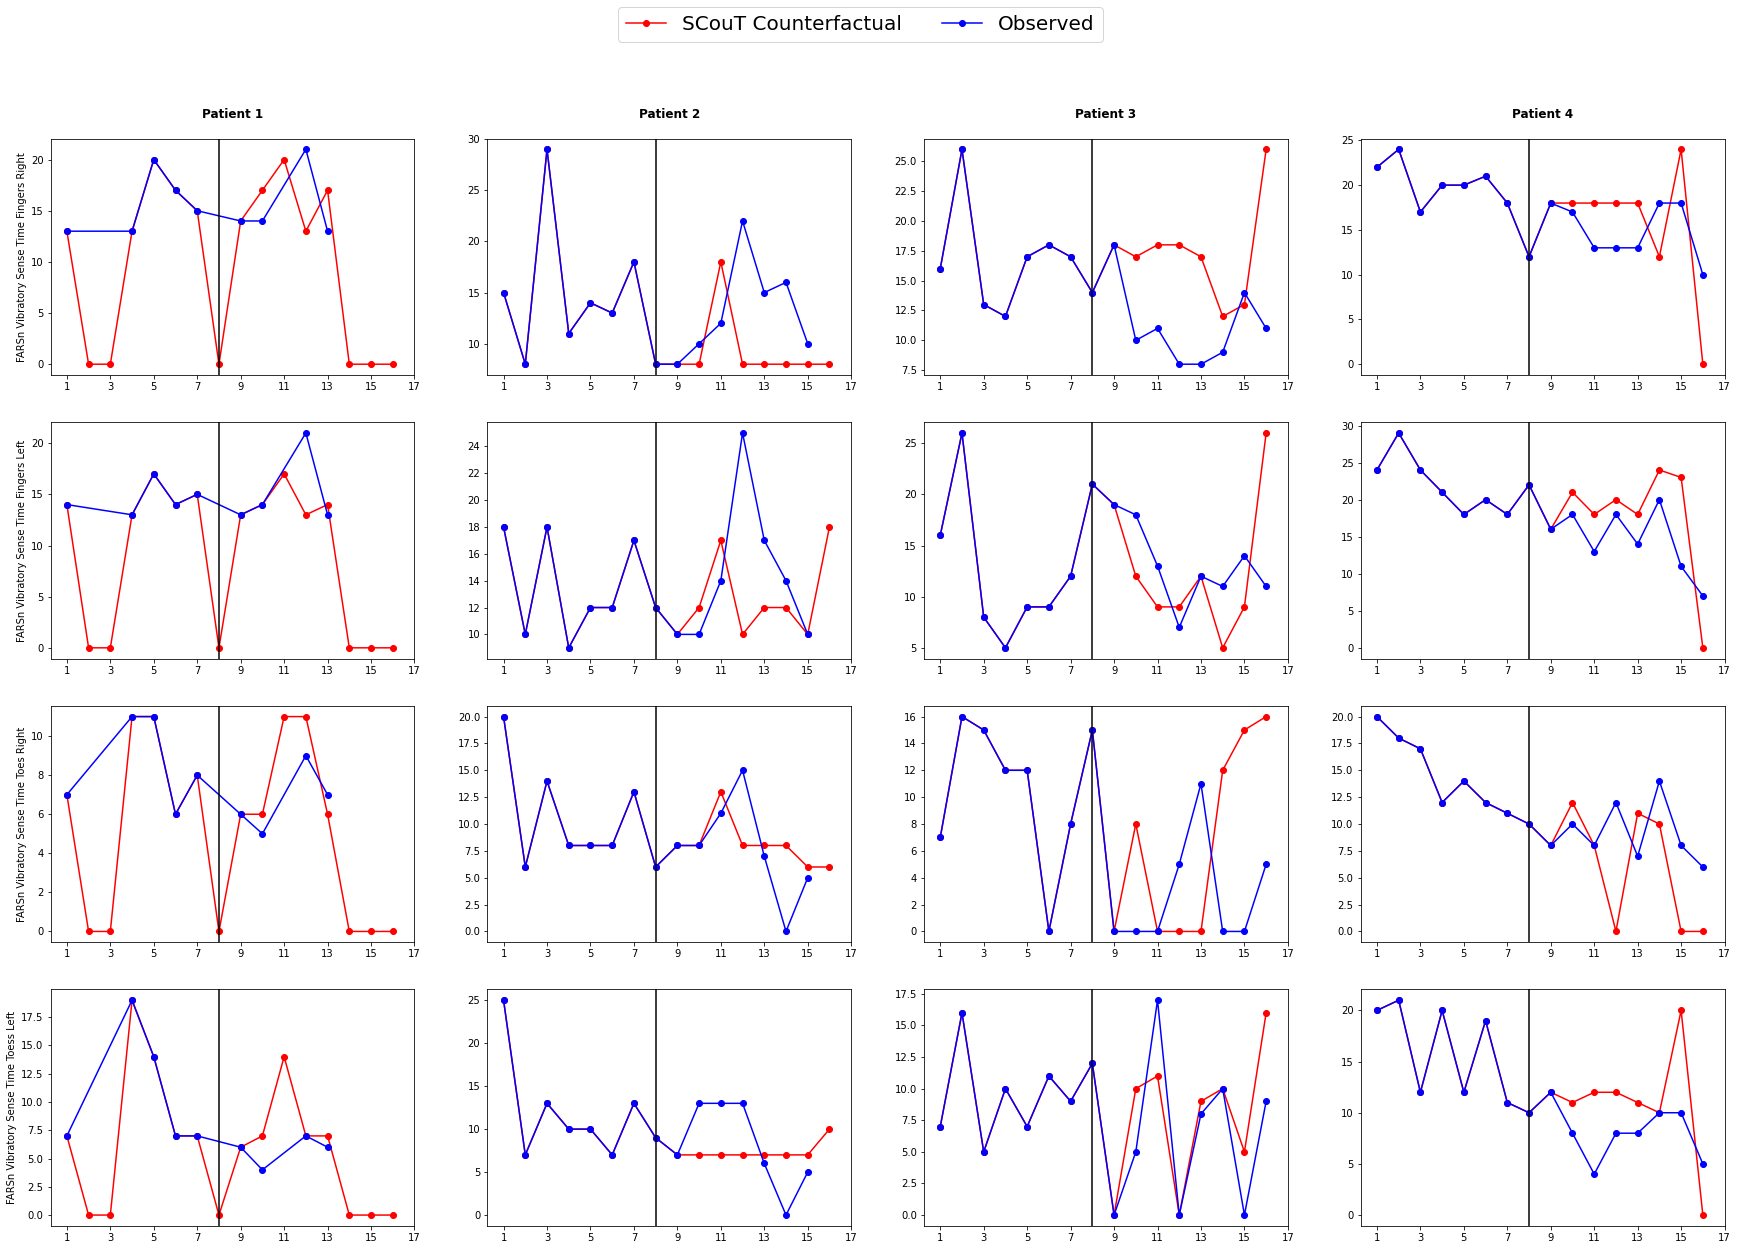

In [29]:


all_data = np.load('../datasets/ataxia_reduc/data.npy',allow_pickle=True)
all_mask = np.load('../datasets/ataxia_reduc/mask.npy',allow_pickle=True)

patients = {'1':0,'20':2,'40':4,'219':None}

xrange = np.arange(1,19)
xint = np.arange(1,19,2)

FARSn_dict_metrics = {'FARSn Vibratory Sense Time Fingers Right':27,
'FARSn Vibratory Sense Time Fingers Left':26 ,
'FARSn Vibratory Sense Time Toes Right':29,
'FARSn Vibratory Sense Time Toess Left':28,}


fig, big_axes = plt.subplots(figsize=(30, 20) , nrows=1, ncols=4, sharey=True) 

for title, big_ax in zip(['Patient 1', 'Patient 2', 'Patient 3', 'Patient 4'], big_axes):
    big_ax.set_title(f'{title}\n', fontweight='semibold',fontsize=20)
    big_ax.set_frame_on(False)
    big_ax.axis('off')


for j, (keys, vals) in enumerate(FARSn_dict_metrics.items()):
    
    for i,(key_patients,value_patients) in enumerate(patients.items()):
        
        patient = int(key_patients)
        if patient != 219:
            datapath = f'../logs_dir/ataxia_{value_patients}/target.npy'
        else:
            datapath = '../logs_dir/patient219_cal/patient219_thesis.npy'
        
        ax = fig.add_subplot(4,4,4*j+i+1)
        
        counterfactual = np.load(datapath)
        mask = (1- all_mask[patient]) > 0 
        observed = all_data[patient]
        metric_counterfactual = counterfactual[4:22,vals]
        ax.plot(xrange[:16],counterfactual[4:20,vals], 'or-',label='SCouT Counterfactual')
        mask_this = mask[:,vals]
        ax.plot(xrange[mask_this],observed[:,vals][mask_this].astype(float), 'ob-',label='Observed')
        ax.axvline(8, c='black')
        
        ax.set_xticks(xint,minor=False)
        # ax.legend()

        if i == 0:
            plt.ylabel(keys)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,labels, loc='lower center',ncol=2,bbox_to_anchor=(0.5,0.94),fontsize=20)
    
plt.show()


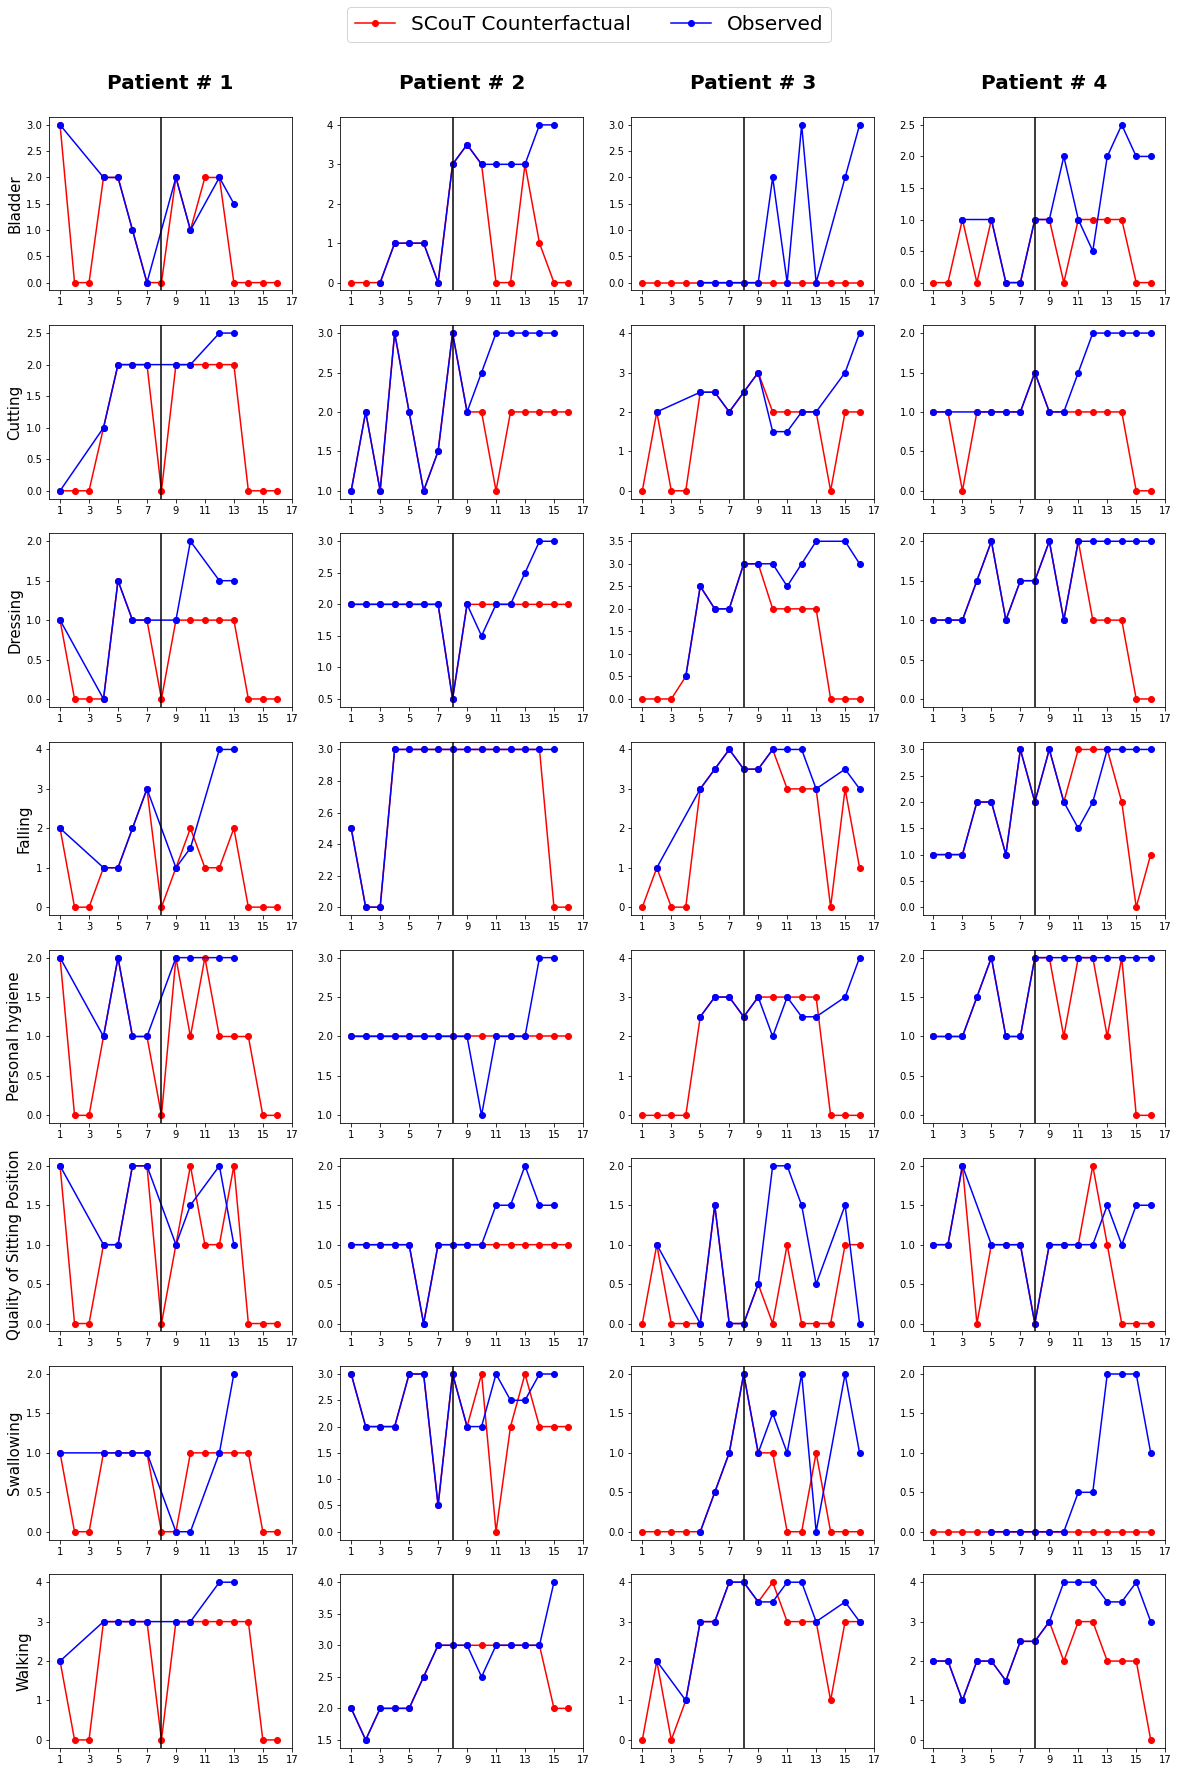

In [34]:


all_data = np.load('../datasets/ataxia_reduc/data.npy',allow_pickle=True)
all_mask = np.load('../datasets/ataxia_reduc/mask.npy',allow_pickle=True)

patients = {'1':0,'20':2,'40':4,'219':None}

xrange = np.arange(1,19)
xint = np.arange(1,19,2)

ADL_dict_metrics = {
            'Bladder':77,
            'Cutting':78,
            'Dressing':79,
            'Falling':80,
            'Personal hygiene':81,
            'Quality of Sitting Position':82,
            'Swallowing':84,
            'Walking':85,}

fig, big_axes = plt.subplots(figsize=(20, 30) , nrows=1, ncols=4, sharey=True) 

for title, big_ax in zip(['Patient # 1', 'Patient # 2', 'Patient # 3', 'Patient # 4'], big_axes):
    big_ax.set_title(f'{title}\n', fontweight='semibold',fontsize=20)
    big_ax.set_frame_on(False)
    big_ax.axis('off')


for j, (keys, vals) in enumerate(ADL_dict_metrics.items()):
    
    for i,(key_patients,value_patients) in enumerate(patients.items()):
        
        patient = int(key_patients)
        if patient != 219:
            datapath = f'../logs_dir/ataxia_{value_patients}/target.npy'
        else:
            datapath = '../logs_dir/patient219_cal/patient219_thesis.npy'
        
        ax = fig.add_subplot(8,4,4*j+i+1)
        
        counterfactual = np.load(datapath)
        mask = (1- all_mask[patient]) > 0 
        observed = all_data[patient]
        metric_counterfactual = counterfactual[4:22,vals]
        ax.plot(xrange[:16],counterfactual[4:20,vals], 'or-',label='SCouT Counterfactual')
        mask_this = mask[:,vals]

        ax.plot(xrange[mask_this],observed[:,vals][mask_this].astype(float), 'ob-',label='Observed')
        ax.axvline(8, c='black')
        
        ax.set_xticks(xint,minor=False)
        # ax.legend()

        if i == 0:
            plt.ylabel(keys,fontsize=15)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,labels, loc='lower center',ncol=2,bbox_to_anchor=(0.5,0.91),fontsize=20)
plt.savefig(f'./figs/adl_ataxia.pdf',bbox_inches='tight')
    
plt.show()


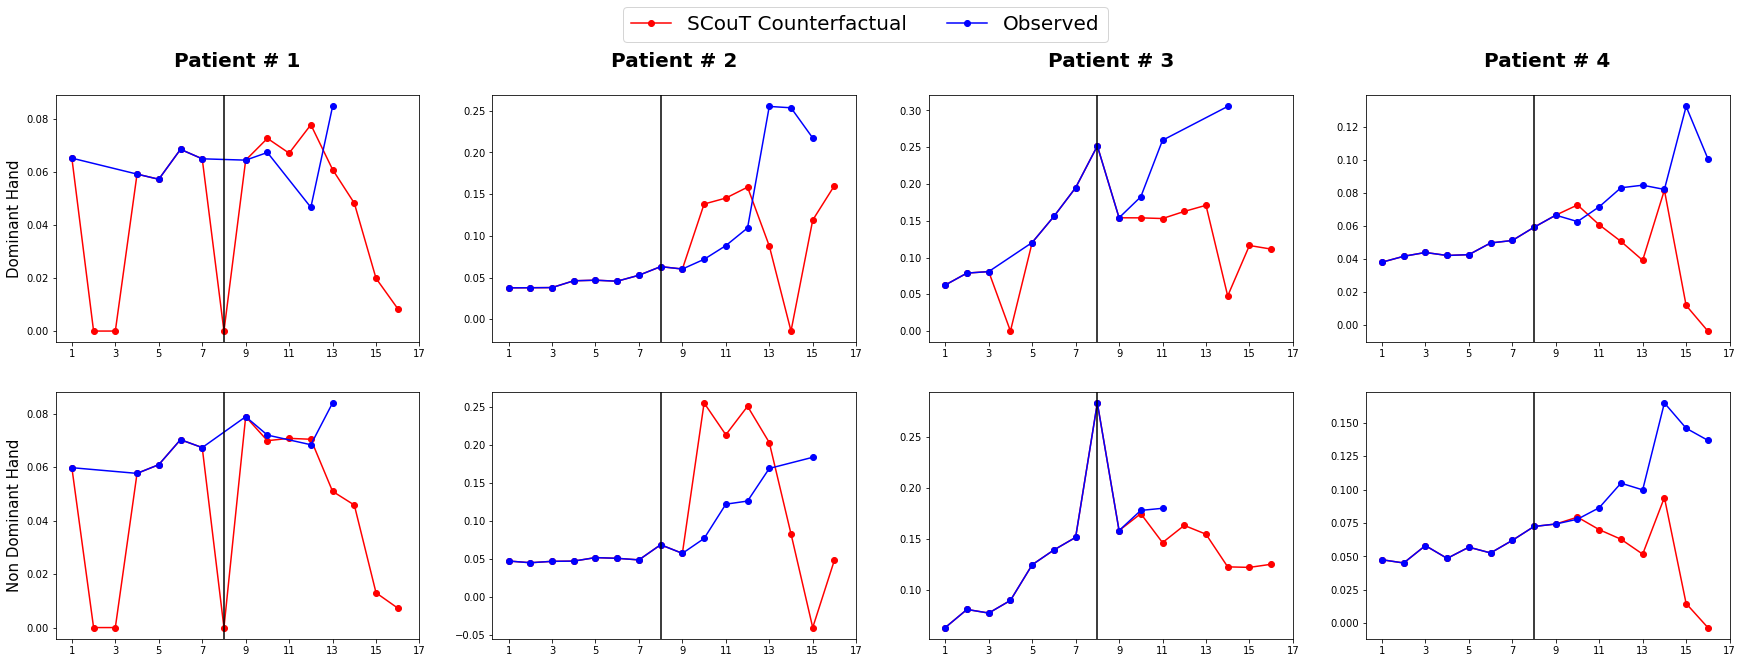

In [30]:


all_data = np.load('../datasets/ataxia_reduc/data.npy',allow_pickle=True)
all_mask = np.load('../datasets/ataxia_reduc/mask.npy',allow_pickle=True)

patients = {'1':0,'20':2,'40':4,'219':None}

xrange = np.arange(1,19)
xint = np.arange(1,19,2)

nine_HPT_dict = {'Dominant Hand':3, 
    'Non Dominant Hand':4} 

fig, big_axes = plt.subplots(figsize=(30, 10) , nrows=1, ncols=4, sharey=True) 

for title, big_ax in zip(['Patient # 1', 'Patient # 2', 'Patient # 3', 'Patient # 4'], big_axes):
    big_ax.set_title(f'{title}\n', fontweight='semibold',fontsize=20)
    big_ax.set_frame_on(False)
    big_ax.axis('off')


for j, (keys, vals) in enumerate(nine_HPT_dict.items()):
    
    for i,(key_patients,value_patients) in enumerate(patients.items()):
        
        patient = int(key_patients)
        if patient != 219:
            datapath = f'../logs_dir/ataxia_{value_patients}/target.npy'
        else:
            datapath = '../logs_dir/patient219_cal/patient219_thesis.npy'
        
        ax = fig.add_subplot(2,4,4*j+i+1)
        
        counterfactual = np.load(datapath)
        mask = (1- all_mask[patient]) > 0 
        observed = all_data[patient]
        metric_counterfactual = counterfactual[4:22,vals]
        ax.plot(xrange[:16],counterfactual[4:20,vals], 'or-',label='SCouT Counterfactual')
        mask_this = mask[:,vals]
        ax.plot(xrange[mask_this],observed[:,vals][mask_this].astype(float), 'ob-',label='Observed')
        ax.axvline(8, c='black')
        
        ax.set_xticks(xint,minor=False)
        # ax.legend()

        if i == 0:
            plt.ylabel(keys,fontsize=15)

handles, labels = ax.get_legend_handles_labels()
plt.savefig(f'./figs/hpt_ataxia.pdf',bbox_inches='tight')
fig.legend(handles,labels, loc='lower center',ncol=2,bbox_to_anchor=(0.5,0.94),fontsize=20)
    
plt.show()
